# 1. Import and Loading 
--- 

### 1.1 Importing data and files from `1_data-understanding` notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26220 entries, 0 to 26219
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              26220 non-null  datetime64[ns]
 1   NodeID            26220 non-null  int64         
 2   MotorCurrent      26220 non-null  float64       
 3   Frequency         26220 non-null  float64       
 4   PIP               26220 non-null  float64       
 5   TubingPressure    26220 non-null  float64       
 6   CasingPressure    26220 non-null  float64       
 7   PIT               26220 non-null  float64       
 8   MotorTemperature  26220 non-null  float64       
 9   XVib              26220 non-null  float64       
 10  Label             26220 non-null  int64         
 11  Time              26220 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 2.4+ MB


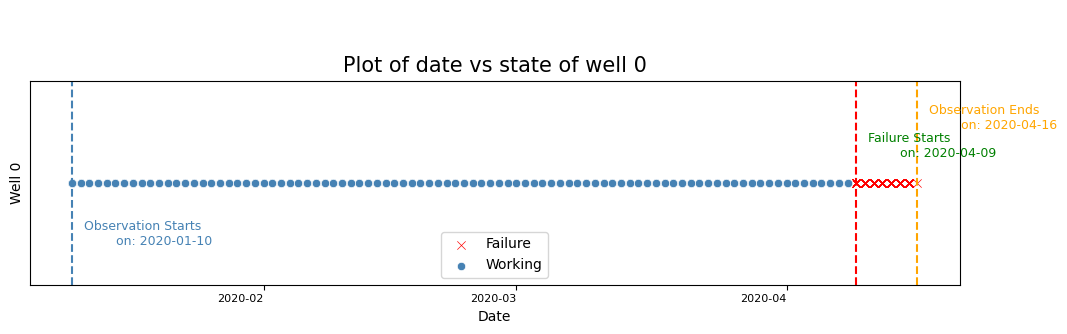

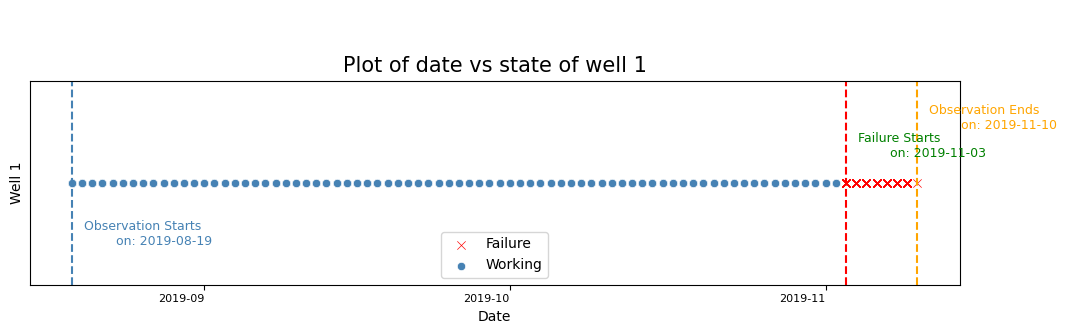

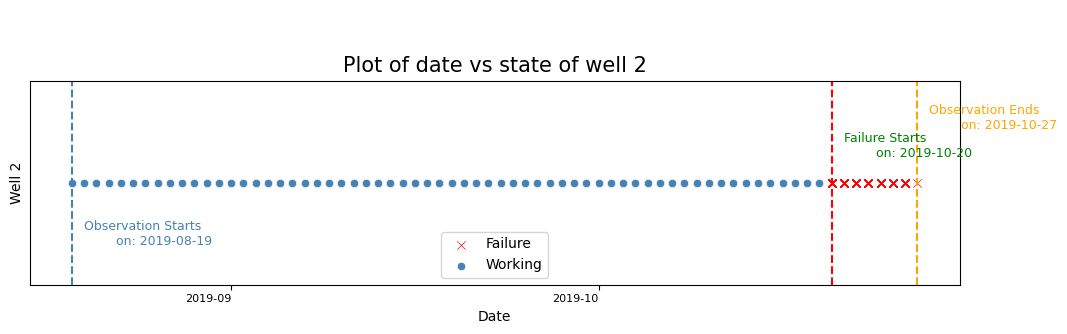

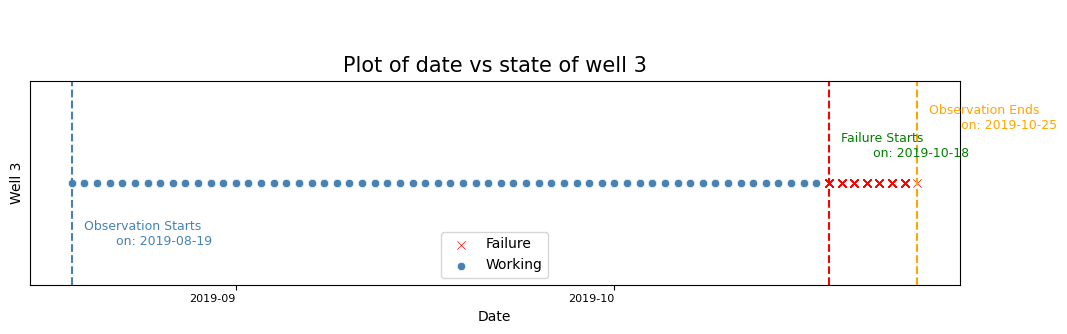

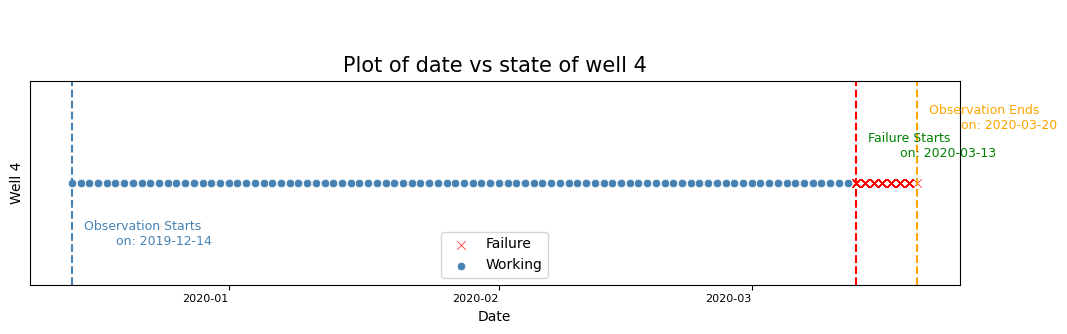

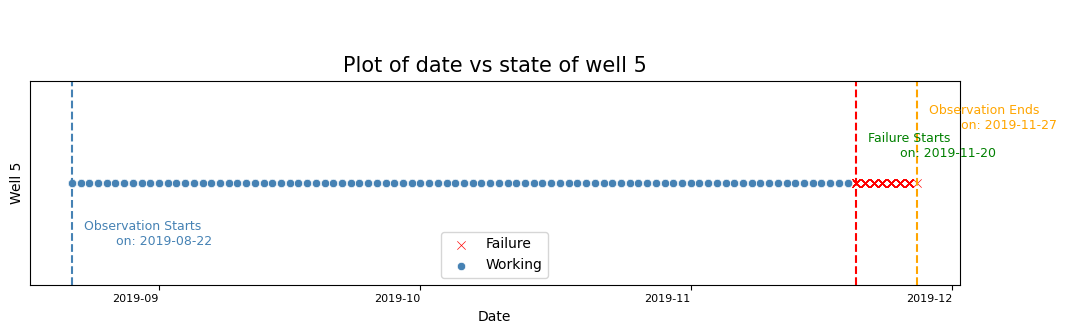

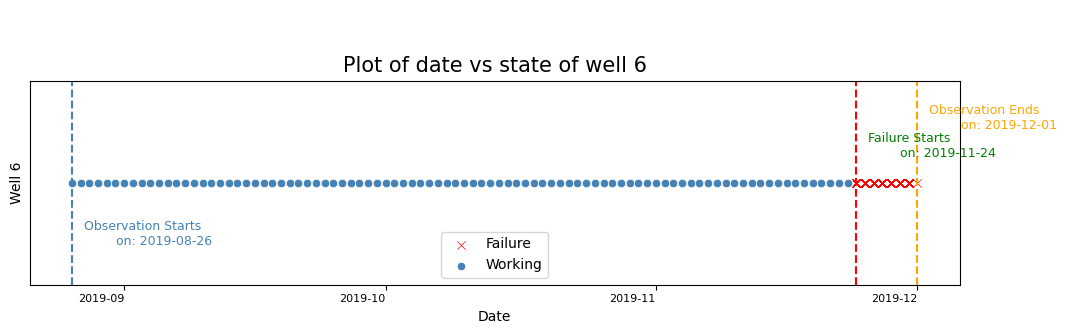

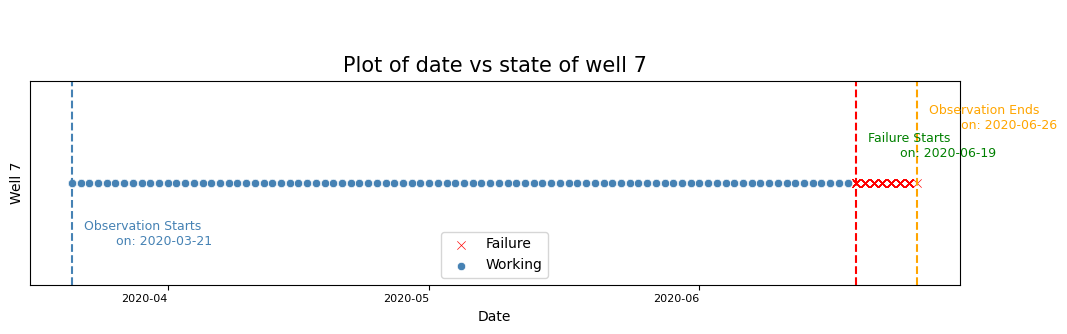

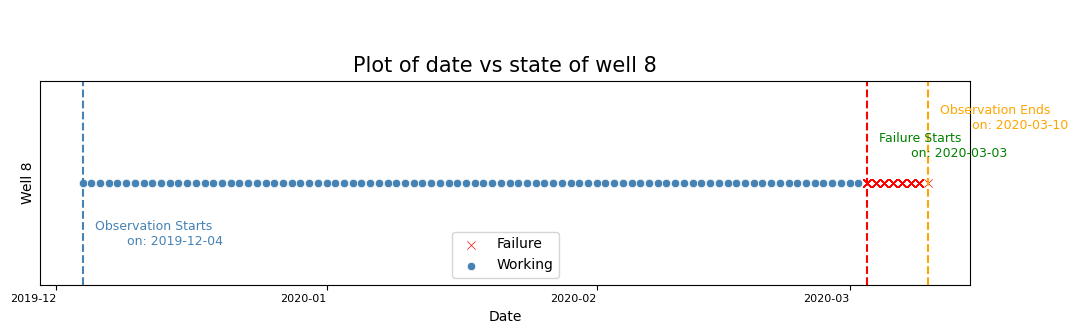

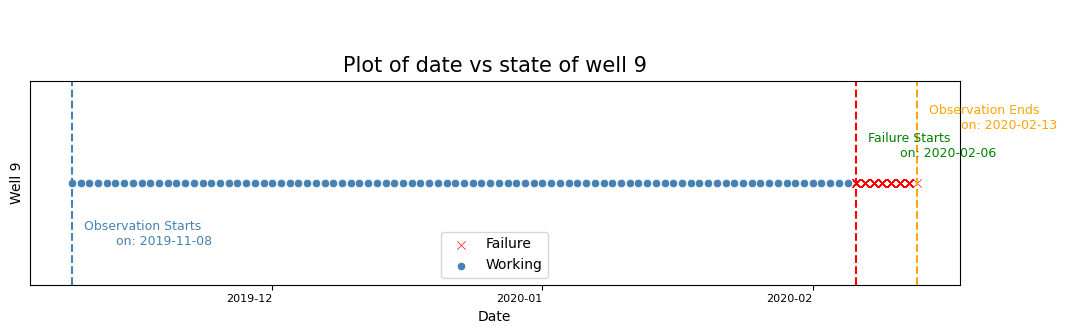

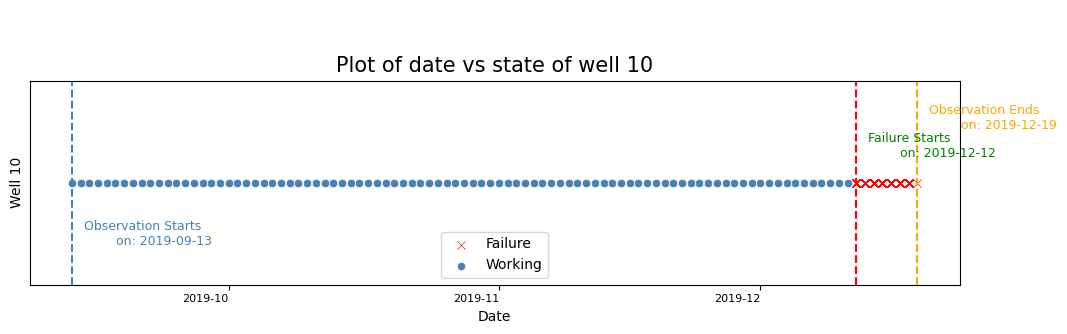

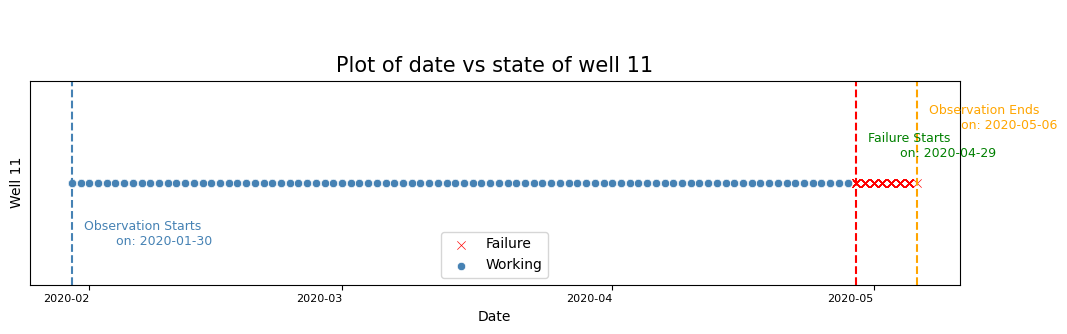

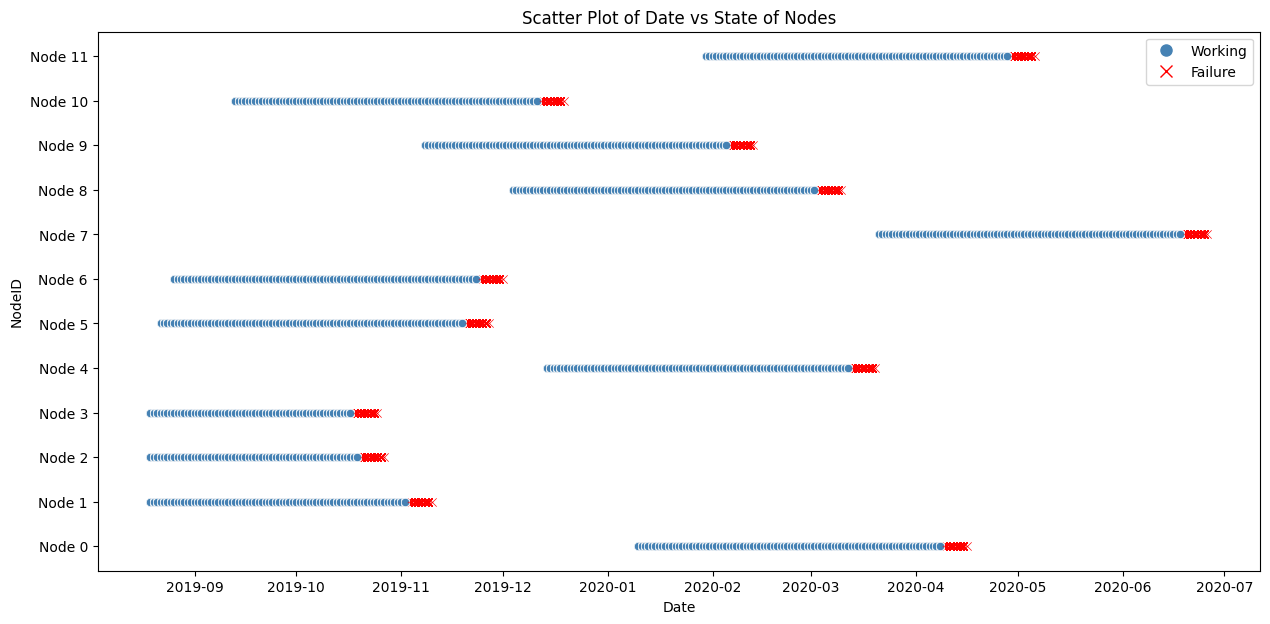

In [16]:
%run 1_data-understanding.ipynb

### 1.2 Importing More Libraries

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 2. Loading `Well 0` at 00:00:00 observation for modelling
--- 

### 2.1 Filtering `Well 0` observations

In [18]:
subdfs[0].head()

,Date,NodeID,MotorCurrent,Frequency,PIP,TubingPressure,CasingPressure,PIT,MotorTemperature,XVib,Label,Time
0,2020-01-10,0,0.690741,0.919376,0.324617,0.427775,0.039333,0.800865,0.833250,0.004845,0,00:00:00
1,2020-01-10,0,0.688889,0.920676,0.324346,0.413583,0.039333,0.800865,0.833500,0.005233,0,01:00:00
2,2020-01-10,0,0.687037,0.920676,0.324301,0.399392,0.039333,0.800865,0.833500,0.004651,0,02:00:00
3,2020-01-10,0,0.688889,0.919258,0.323632,0.399392,0.039758,0.800865,0.832795,0.004651,0,03:00:00
4,2020-01-10,0,0.688889,0.927769,0.327327,0.399392,0.044000,0.802338,0.835799,0.004651,0,04:00:00


### 2. Filtering observations at time `00:00:00` in `Well 0`

In [19]:
subdf_0_at_00 = subdf_by_time['00:00:00']
subdf_0_at_00.head()

,Date,NodeID,MotorCurrent,Frequency,PIP,TubingPressure,CasingPressure,PIT,MotorTemperature,XVib,Label,Time
0,2020-01-10,0,0.690741,0.919376,0.324617,0.427775,0.039333,0.800865,0.833250,0.004845,0,00:00:00
24,2020-01-11,0,0.691111,0.920676,0.322395,0.454131,0.048667,0.800865,0.834352,0.004651,0,00:00:00
48,2020-01-12,0,0.688889,0.920676,0.317121,0.482514,0.044000,0.800865,0.832248,0.003876,0,00:00:00
72,2020-01-13,0,0.688889,0.920676,0.312288,0.458861,0.044000,0.800865,0.832499,0.004845,0,00:00:00
96,2020-01-14,0,0.688889,0.920676,0.310075,0.454131,0.039333,0.800865,0.832248,0.004457,0,00:00:00


# 3. Splitting the dataset into `X` and `y` for training 

> **Note 1:** I am assuming the relationship between X and y to be independent of time. Hence not including the Date feature.
>
> **Note 2:** I am also dropping NodeID and Time features. As, Since all the observation are from same node and at same time and variance will be zero and will not contribute to model.

In [20]:
X = subdf_0_at_00[['MotorCurrent', 'Frequency', 'PIP', 'TubingPressure',
       'CasingPressure', 'PIT', 'MotorTemperature', 'XVib']]
y = subdf_0_at_00['Label']

In [21]:
X.head()

,MotorCurrent,Frequency,PIP,TubingPressure,CasingPressure,PIT,MotorTemperature,XVib
0,0.690741,0.919376,0.324617,0.427775,0.039333,0.800865,0.833250,0.004845
24,0.691111,0.920676,0.322395,0.454131,0.048667,0.800865,0.834352,0.004651
48,0.688889,0.920676,0.317121,0.482514,0.044000,0.800865,0.832248,0.003876
72,0.688889,0.920676,0.312288,0.458861,0.044000,0.800865,0.832499,0.004845
96,0.688889,0.920676,0.310075,0.454131,0.039333,0.800865,0.832248,0.004457


In [22]:
y

0       0
24      0
48      0
72      0
96      0
       ..
2232    1
2256    1
2280    1
2304    1
2328    1
Name: Label, Length: 98, dtype: int64

### 3.1 Train-Test Split: Stratified 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (78, 8)
y_train: (78,)

Testing set shapes:
X_test: (20, 8)
y_test: (20,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (78, 8)
y_train: (78,)

Testing set shapes:
X_test: (20, 8)
y_test: (20,)


# 5. Logistic Regression Model

### 5.1 Model Fitting 

In [25]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### 5.1.1 Coefficients of Model

In [26]:
coefficients_df = pd.DataFrame({'Feature': X.columns , 'Coefficient': lr_model.coef_[0]})
coefficients_df

,Feature,Coefficient
0,MotorCurrent,0.038127
1,Frequency,0.101619
2,PIP,-0.107422
3,TubingPressure,-0.703028
4,CasingPressure,-0.016422
5,PIT,0.098496
6,MotorTemperature,-0.197022
7,XVib,0.001978


In [27]:
print("Intercept Value:", lr_model.intercept_[0])

Intercept Value: -2.237683624808585


### 5.2 Performance Metric 

In [28]:
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Value': [accuracy, precision, recall, f1]
})

metrics_df.T

,0,1,2,3
Metric,Accuracy,Precision,Recall,F1-score
Value,0.9,1.0,0.0,0.0


### 5.3 Confusion Matrix

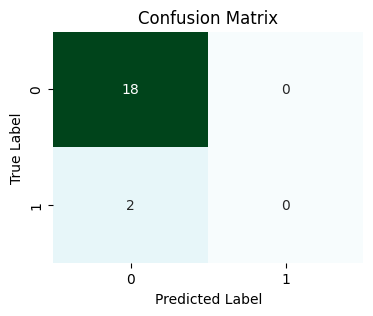

In [29]:
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()